In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import pickle

In [4]:
# functions for furthre useage
def mark_values(x_axis, y_axis):
    """
    mark the actul values on the plot
    :param x_axis: a list of x-axis values
    :type x_axis: list
    """
    for x, y in zip(x_axis, y_axis):
        label = "{:.2f}".format(y)
        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,8), # distance from text to points (x,y)
                     ha='center')
# note that combo needs different visualization
def make_combo_plots_on_dataset(zero_style, eval_method):
    """
    make plots for model performance comparision
    :param zero_style: the approach of zeroing attention heads,
                       including 'first', 'random' and 'shuffle'
    :type zero_style: str
    :param eval_method: the evaluation metrics for plotting,
                        methods including auc/accu on c-d, c/d, log(c/d) on training and test set
    :type eval_method: str
    """
    plt.rcParams["figure.figsize"] = (18,5)
    full = []
    mild = []
    slight = []
    for share in (25, 50, 75, 100):
        full_file = "comb_{}_{}_full.pkl".format(zero_style, share)
        mild_file = "comb_{}_{}_mild.pkl".format(zero_style, share)
        slight_file = "comb_{}_{}_slight.pkl".format(zero_style, share)
        with open(full_file, "rb") as f:
            full.extend(pickle.load(f)[eval_method])
        with open(mild_file, "rb") as f:
            mild.extend(pickle.load(f)[eval_method])
        with open(slight_file, "rb") as f:
            slight.extend(pickle.load(f)[eval_method])
    shares = ['25%', '50%', '75%', '100%']
    model_type = eval_method.split("_")[1]
    data_type = eval_method.split("_")[0]
    eval_metrics = eval_method.split("_")[2]
    plt.plot(shares, full, label="full")
    plt.plot(shares, mild, label="mild")
    plt.plot(shares, slight, label="slight")
    plt.legend()
    mark_values(shares, full)
    mark_values(shares, mild)
    mark_values(shares, slight)
    plt.title("{} of {} zeroing approach with {} model on {} dataset".format(
        eval_metrics, zero_style, model_type, data_type), fontsize=18)
    plt.show()

## Combo, plots across dataset

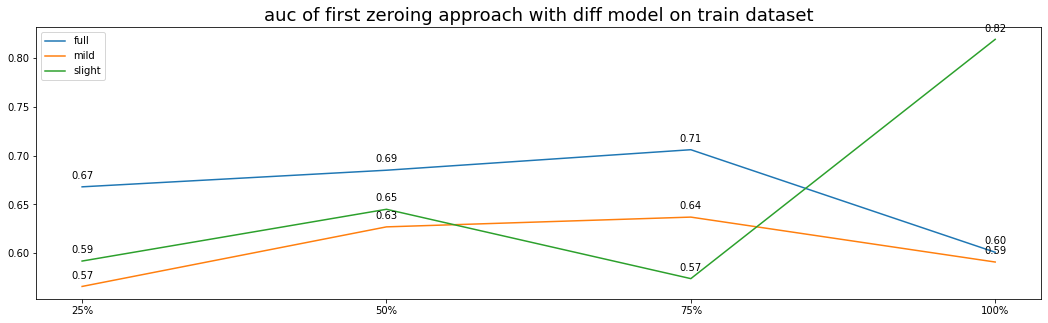

In [9]:
# plots across dataset
# combination of best performance layers
make_combo_plots_on_dataset("first", "train_diff_auc")

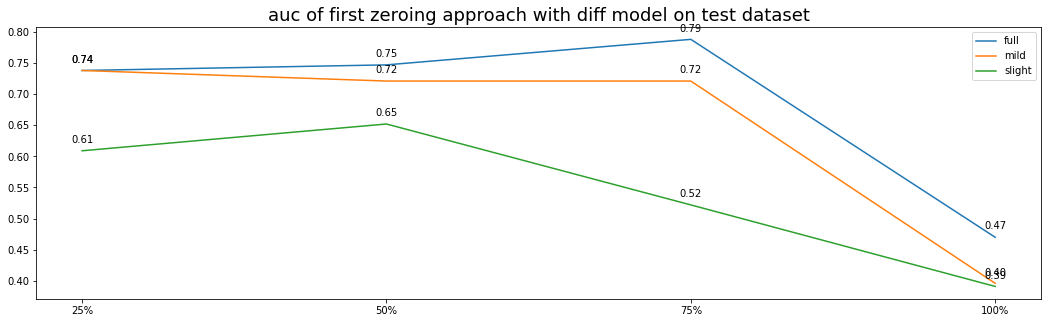

In [10]:
make_combo_plots_on_dataset("first", "test_diff_auc")

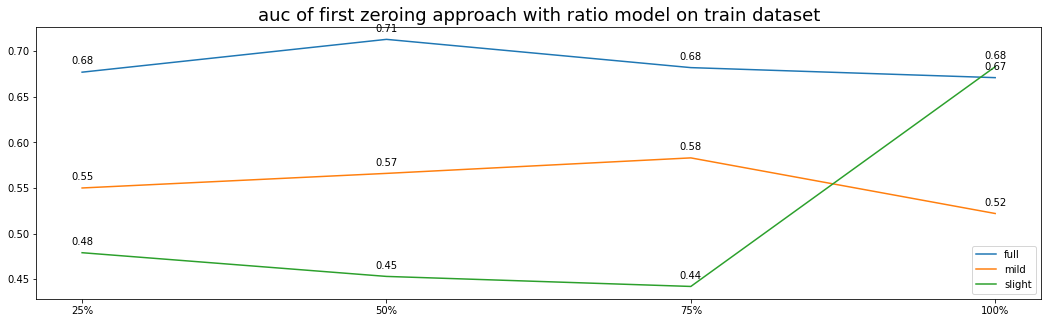

In [11]:
make_combo_plots_on_dataset("first", "train_ratio_auc")

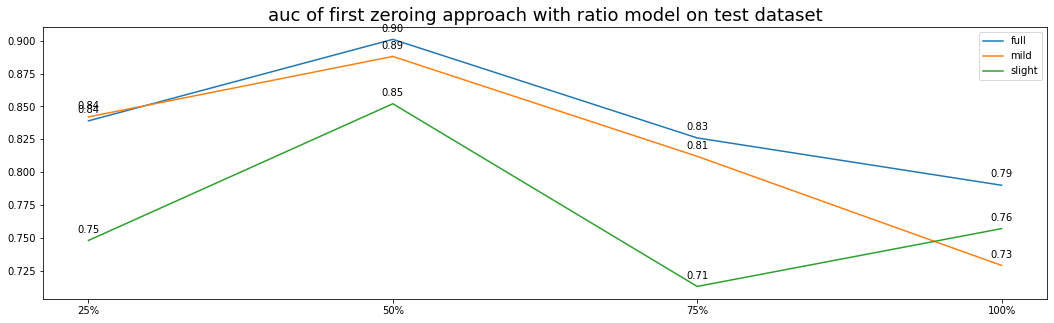

In [12]:
make_combo_plots_on_dataset("first", "test_ratio_auc")

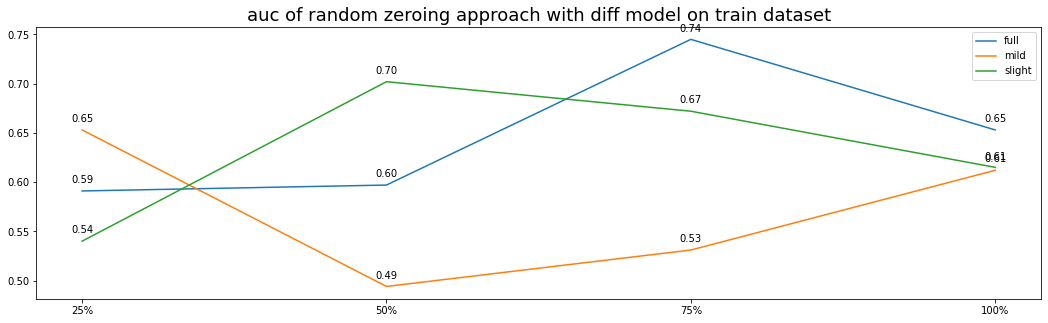

In [13]:
make_combo_plots_on_dataset("random", "train_diff_auc")

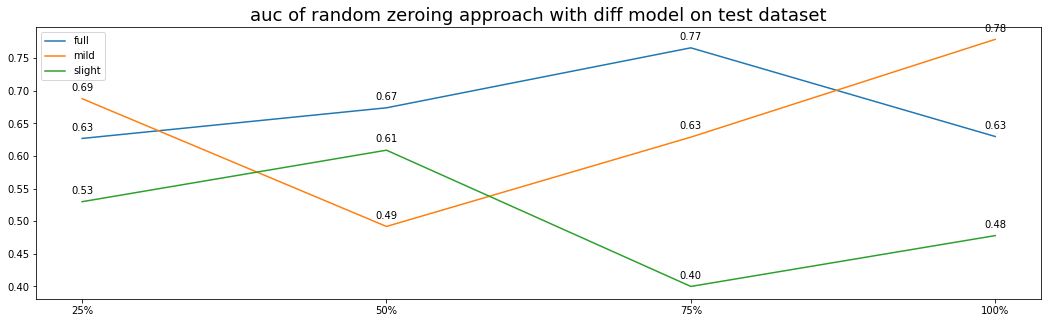

In [14]:
make_combo_plots_on_dataset("random", "test_diff_auc")

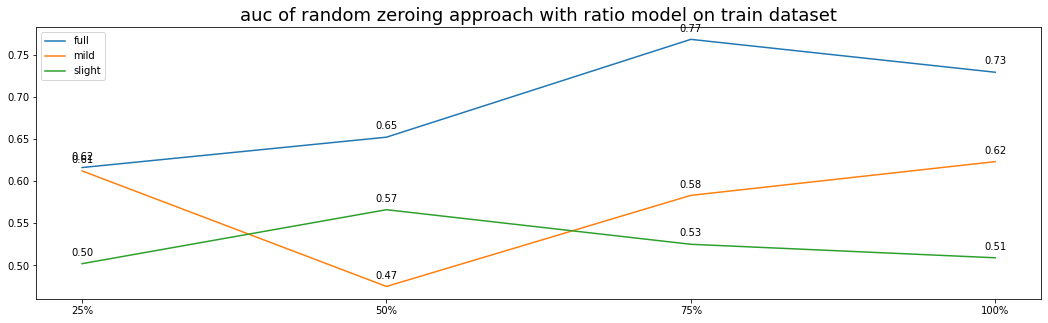

In [15]:
make_combo_plots_on_dataset("random", "train_ratio_auc")

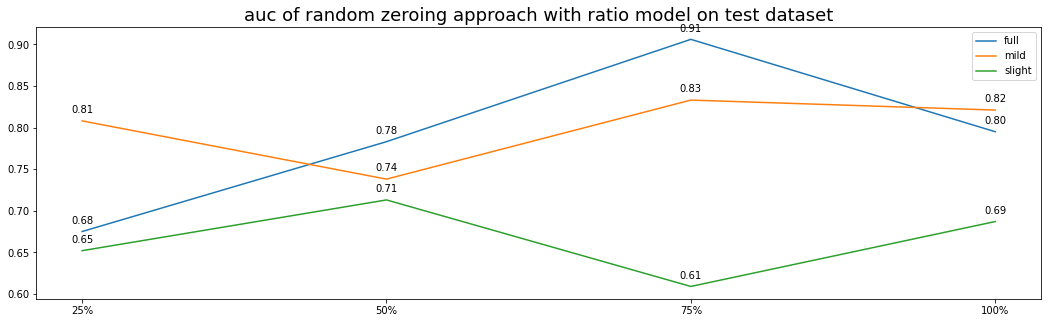

In [16]:
make_combo_plots_on_dataset("random", "test_ratio_auc")

In [15]:
# accumulately zeroing attention heads
def make_accumu_plots_on_dataset(zero_style, eval_method, share):
    """
    make plots for model performance comparision
    :param zero_style: the approach of zeroing attention heads,
                       including 'first', 'random' and 'shuffle'
    :type zero_style: str
    :param eval_method: the evaluation metrics for plotting,
                        methods including auc/accu on c-d, c/d, log(c/d) on training and test set
    :type eval_method: str
    :param share: % of attention heads get zeroed
    :type share: int
    """
    plt.rcParams["figure.figsize"] = (18,5)
    full_file = "accumu_{}_{}_full.pkl".format(zero_style, share)
    mild_file = "accumu_{}_{}_mild.pkl".format(zero_style, share)
    slight_file = "accumu_{}_{}_slight.pkl".format(zero_style, share)
    layers = list(range(1, 13))
    model_type = eval_method.split("_")[1]
    data_type = eval_method.split("_")[0]
    eval_metrics = eval_method.split("_")[2]
    with open(full_file, "rb") as f:
        full = pickle.load(f)
    with open(mild_file, "rb") as f:
        mild = pickle.load(f)
    with open(slight_file, "rb") as f:
        slight = pickle.load(f)
    plt.plot(layers, full[eval_method], label="full")
    plt.plot(layers, mild[eval_method], label="mild")
    plt.plot(layers, slight[eval_method], label="slight")
    plt.legend()
    mark_values(layers, full[eval_method])
    mark_values(layers, mild[eval_method])
    mark_values(layers, slight[eval_method])
    plt.title("{} of {} zeroing approach with {} model on {} dataset".format(
        eval_metrics, zero_style, model_type, data_type), fontsize=18)
    plt.show()

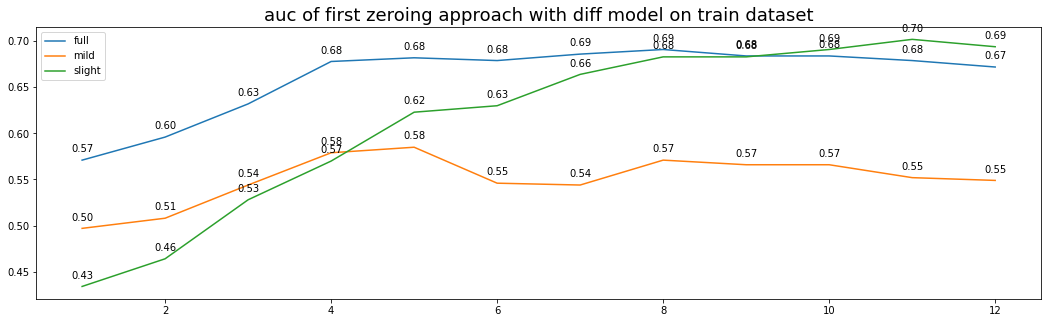

In [16]:
make_accumu_plots_on_dataset("first", "train_diff_auc", 25)

In [29]:
# first vs. random

def make_plots_on_zero_style(hammer_style, share, dataset_type,
                             model_type, eval_metrics, set_1, set_2):
    plt.rcParams["figure.figsize"] = (18,5)
    eval_1 = "{}_{}_{}".format(set_1, model_type, eval_metrics)
    eval_2 = "{}_{}_{}".format(set_2, model_type, eval_metrics)
    if hammer_style == "combo":
        first = []
        random = []
        for share in (25, 50, 75, 100):
            first_file = "comb_first_{}_{}.pkl".format(share, dataset_type)
            random_file = "comb_random_{}_{}.pkl".format(share, dataset_type)
            with open(first_file, "rb") as f:
                first.extend(pickle.load(f)[eval_1])
            with open(random_file, "rb") as f:
                random.extend(pickle.load(f)[eval_2])
        shares = ['25%', '50%', '75%', '100%']
        plt.plot(shares, first, label="first")
        plt.plot(shares, random, label="random")
        plt.legend()
        mark_values(shares, first)
        mark_values(shares, random)
        plt.title("{} of zeroing approach comparision with {} model on {}, {} {} dataset".format(
        eval_metrics, model_type, set_1, set_2, dataset_type), fontsize=18)
        plt.show()
        cor, p_val = pearsonr(first, random)
        print("corr: {}\n p-val:{}".format(cor, p_val))
    elif hammer_style == "accumu":
        pass
    else:
        print("wrong hammer type!")

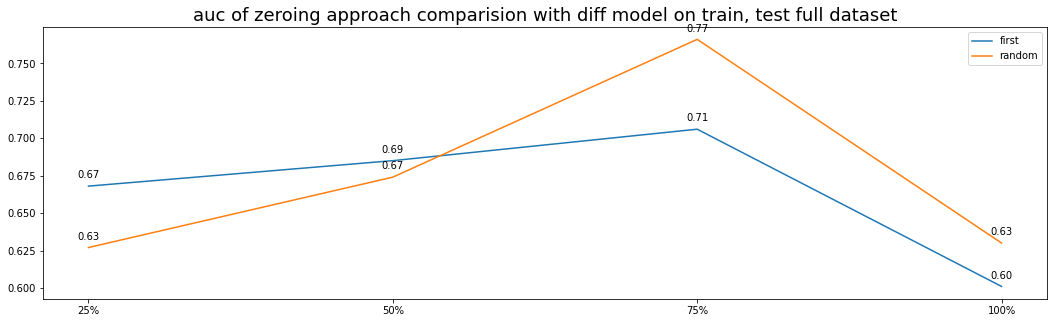

corr: 0.7299896379741443
 p-val:0.2700103620258557


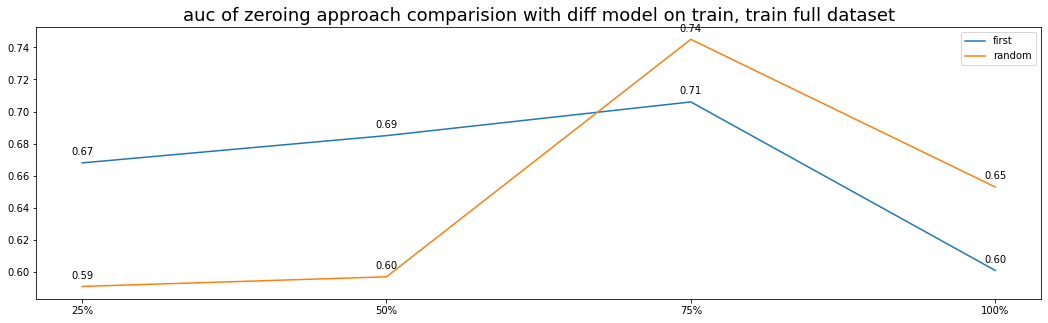

corr: 0.2536865865908962
 p-val:0.7463134134091038


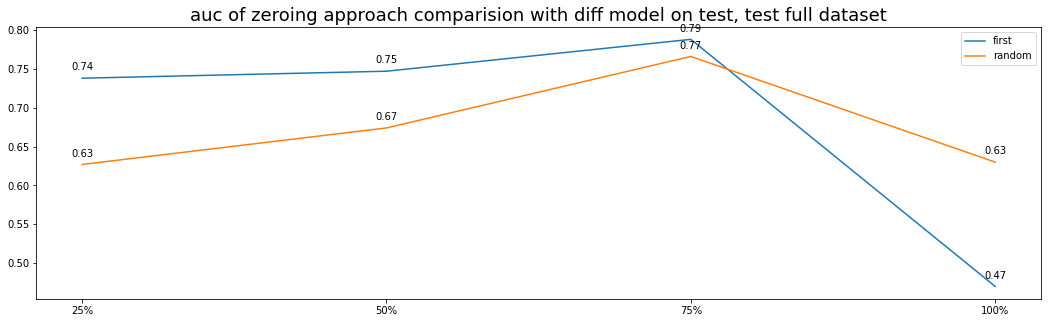

corr: 0.5812237429921576
 p-val:0.4187762570078424


In [45]:
make_plots_on_zero_style("combo", 25, "full", "diff", "auc", "train", "test")
make_plots_on_zero_style("combo", 25, "full", "diff", "auc", "train", "train")
make_plots_on_zero_style("combo", 25, "full", "diff", "auc", "test", "test")

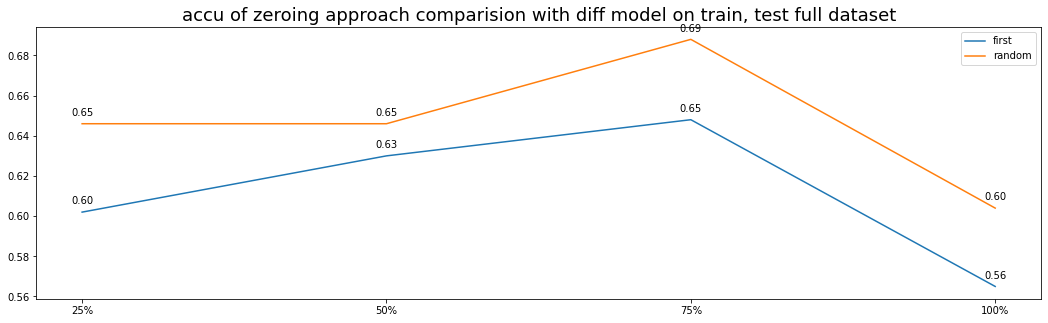

corr: 0.9365834264362071
 p-val:0.06341657356379293


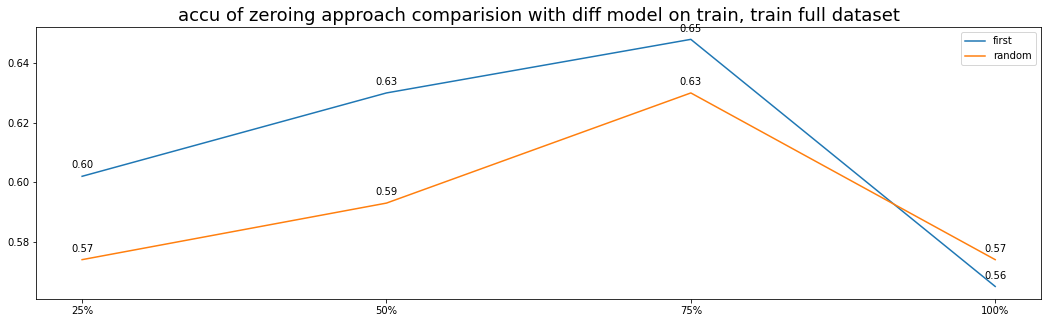

corr: 0.8425866253409708
 p-val:0.15741337465902916


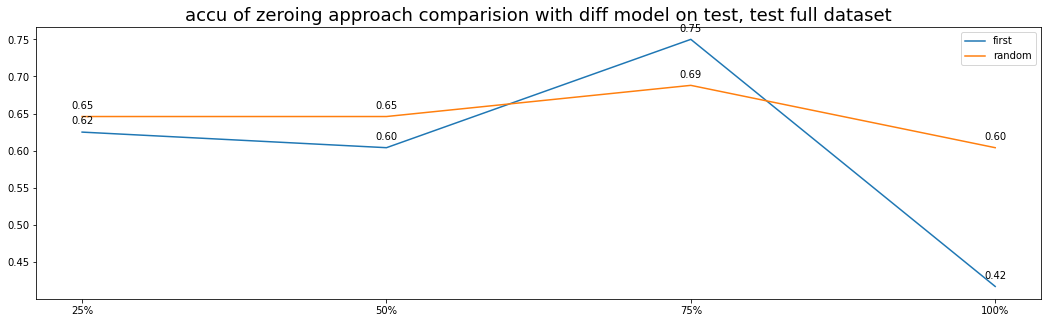

corr: 0.9895125195332302
 p-val:0.010487480466769838


In [46]:
make_plots_on_zero_style("combo", 25, "full", "diff", "accu", "train", "test")
make_plots_on_zero_style("combo", 25, "full", "diff", "accu", "train", "train")
make_plots_on_zero_style("combo", 25, "full", "diff", "accu", "test", "test")

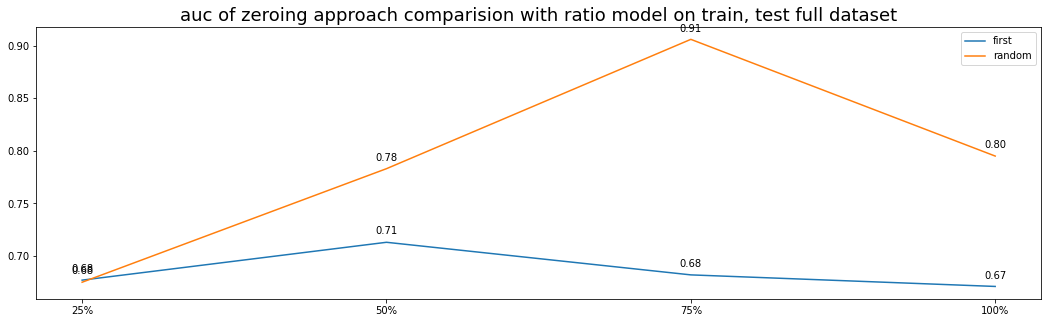

corr: 0.057854137502659775
 p-val:0.9421458624973402


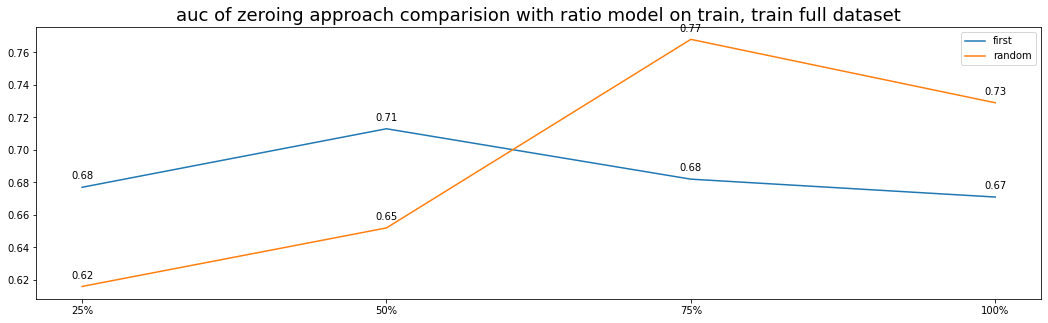

corr: -0.32150584580169084
 p-val:0.6784941541983092


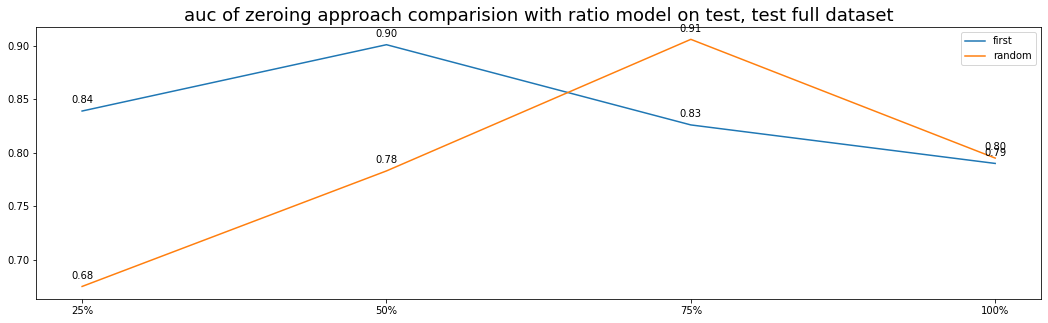

corr: -0.1669490132976533
 p-val:0.8330509867023467


In [48]:
make_plots_on_zero_style("combo", 25, "full", "ratio", "auc", "train", "test")
make_plots_on_zero_style("combo", 25, "full", "ratio", "auc", "train", "train")
make_plots_on_zero_style("combo", 25, "full", "ratio", "auc", "test", "test")

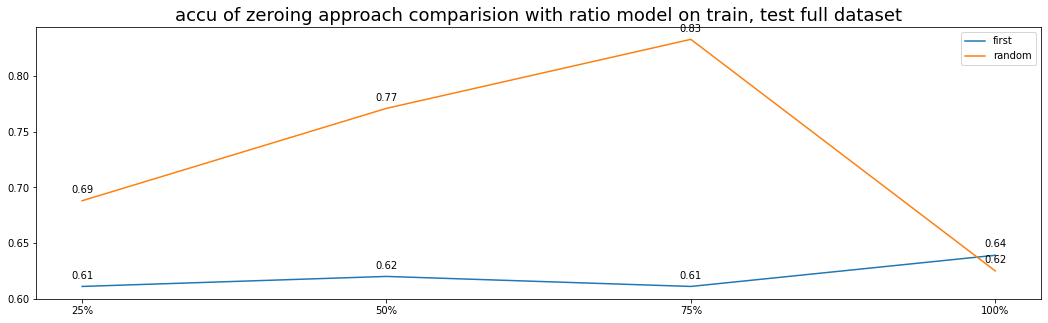

corr: -0.7024354276098754
 p-val:0.29756457239012457


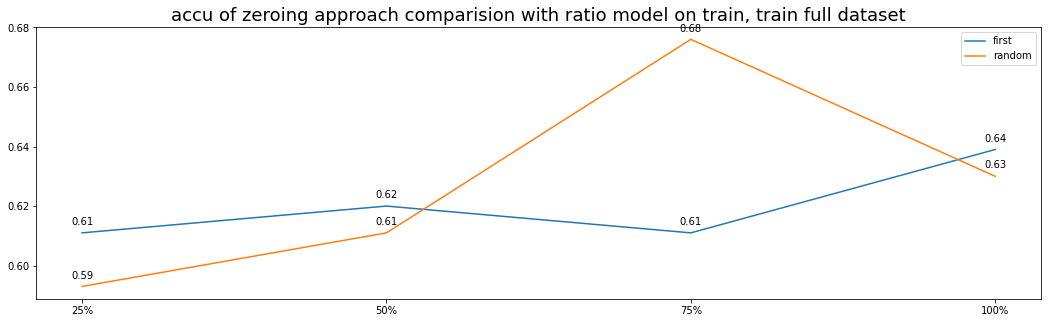

corr: -0.055543611828874476
 p-val:0.9444563881711255


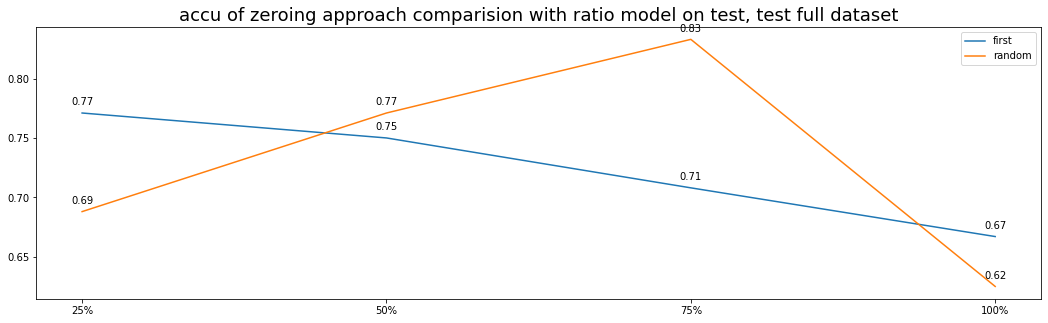

corr: 0.27088280060567055
 p-val:0.7291171993943295


In [47]:
make_plots_on_zero_style("combo", 25, "full", "ratio", "accu", "train", "test")
make_plots_on_zero_style("combo", 25, "full", "ratio", "accu", "train", "train")
make_plots_on_zero_style("combo", 25, "full", "ratio", "accu", "test", "test")

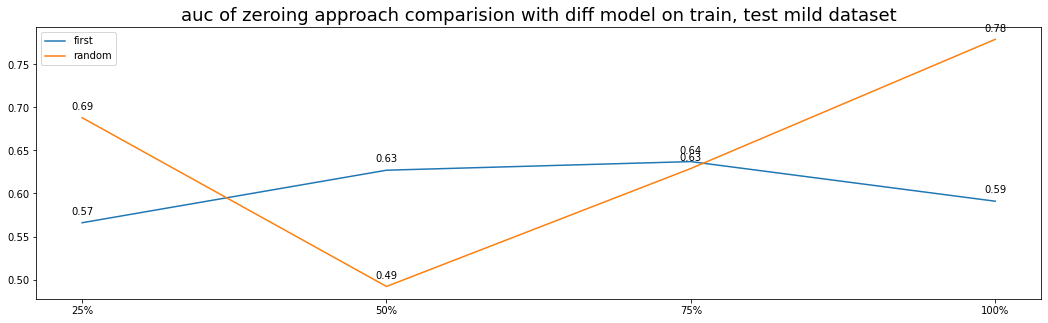

corr: -0.6279155338210137
 p-val:0.3720844661789863


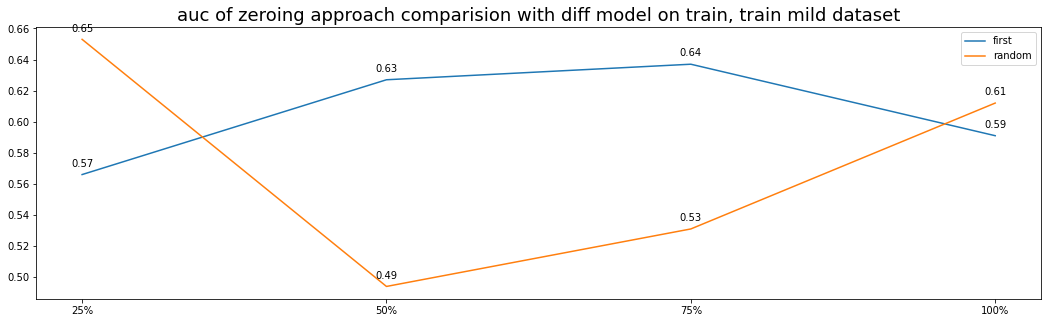

corr: -0.941575494506044
 p-val:0.05842450549395595


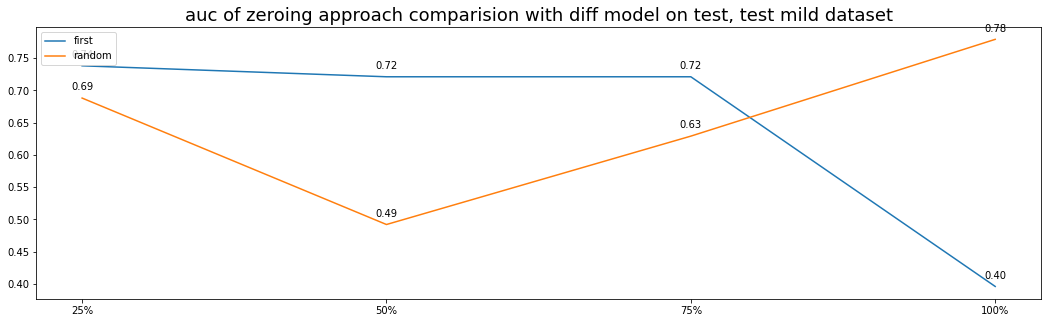

corr: -0.7061513903684744
 p-val:0.2938486096315256


In [50]:
make_plots_on_zero_style("combo", 25, "mild", "diff", "auc", "train", "test")
make_plots_on_zero_style("combo", 25, "mild", "diff", "auc", "train", "train")
make_plots_on_zero_style("combo", 25, "mild", "diff", "auc", "test", "test")

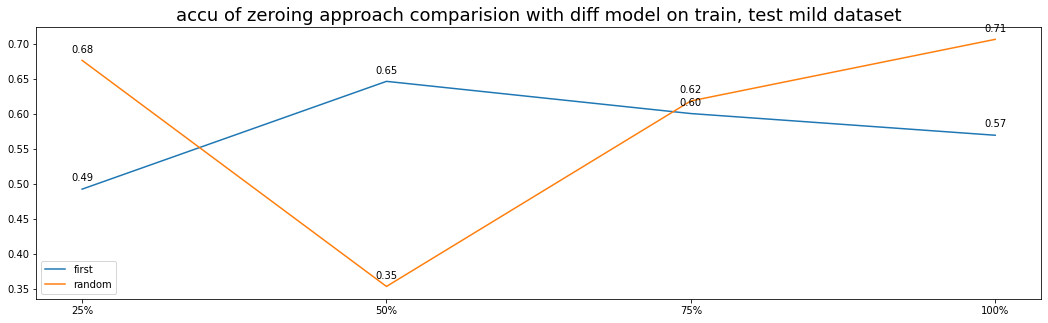

corr: -0.765586991454894
 p-val:0.23441300854510605


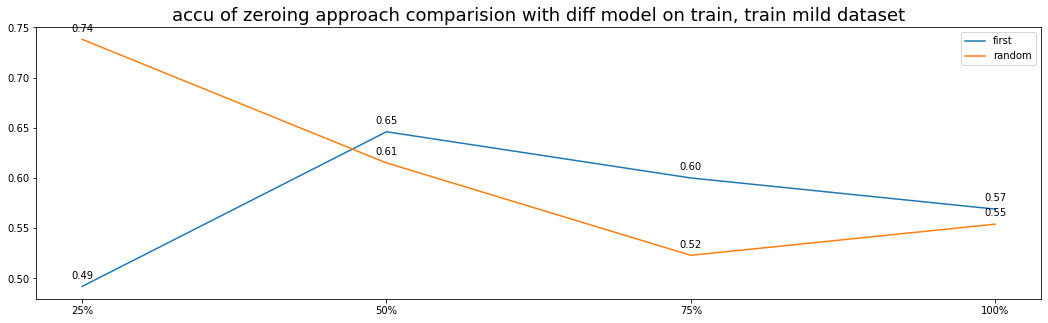

corr: -0.6549814976681028
 p-val:0.34501850233189724


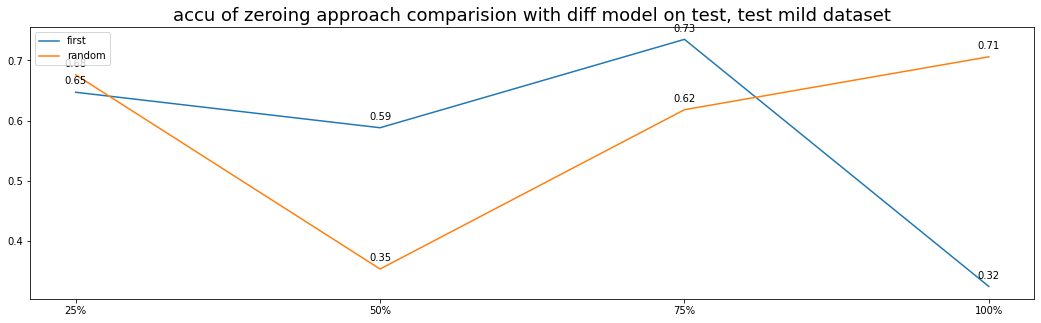

corr: -0.2519118294926431
 p-val:0.7480881705073569


In [51]:
make_plots_on_zero_style("combo", 25, "mild", "diff", "accu", "train", "test")
make_plots_on_zero_style("combo", 25, "mild", "diff", "accu", "train", "train")
make_plots_on_zero_style("combo", 25, "mild", "diff", "accu", "test", "test")

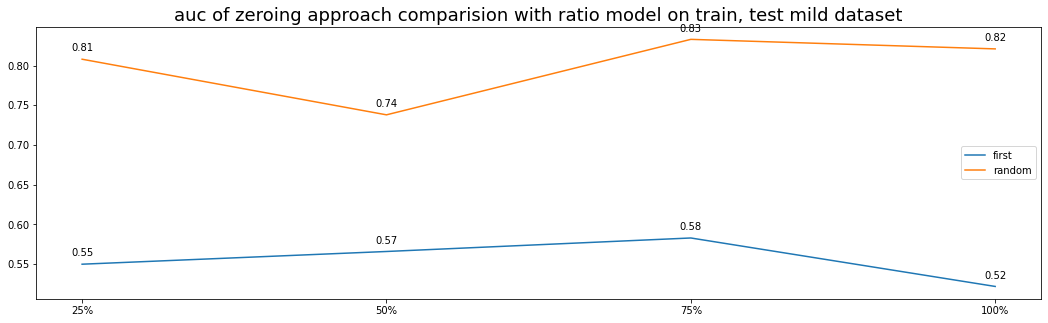

corr: -0.1481905877957448
 p-val:0.8518094122042552


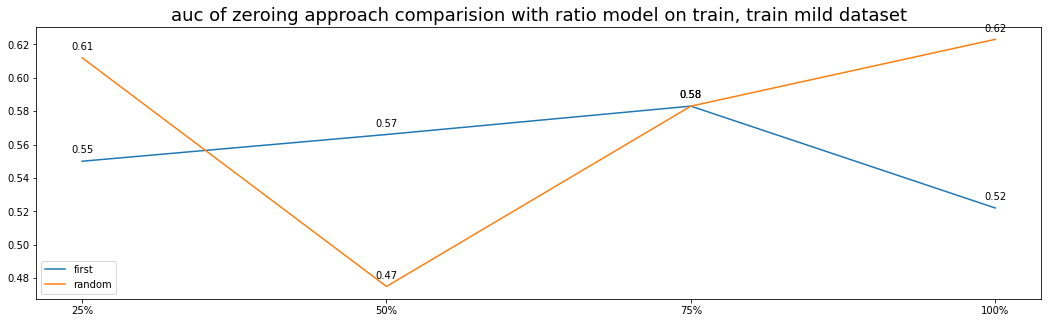

corr: -0.5021630458417442
 p-val:0.4978369541582558


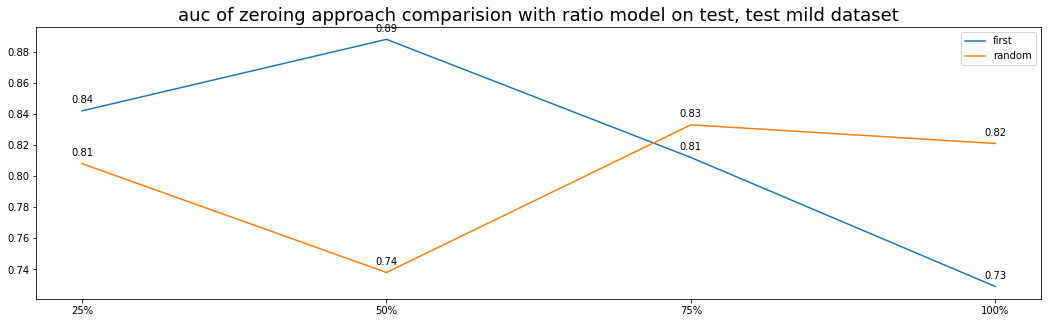

corr: -0.7271752105122298
 p-val:0.2728247894877702


In [52]:
make_plots_on_zero_style("combo", 25, "mild", "ratio", "auc", "train", "test")
make_plots_on_zero_style("combo", 25, "mild", "ratio", "auc", "train", "train")
make_plots_on_zero_style("combo", 25, "mild", "ratio", "auc", "test", "test")

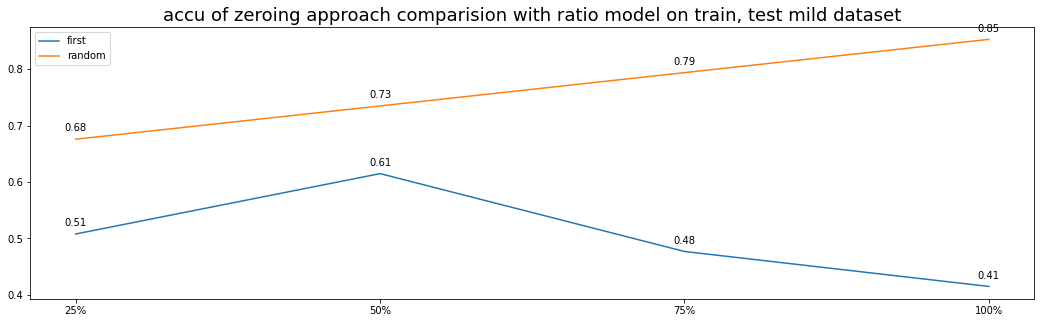

corr: -0.6436480570186772
 p-val:0.3563519429813228


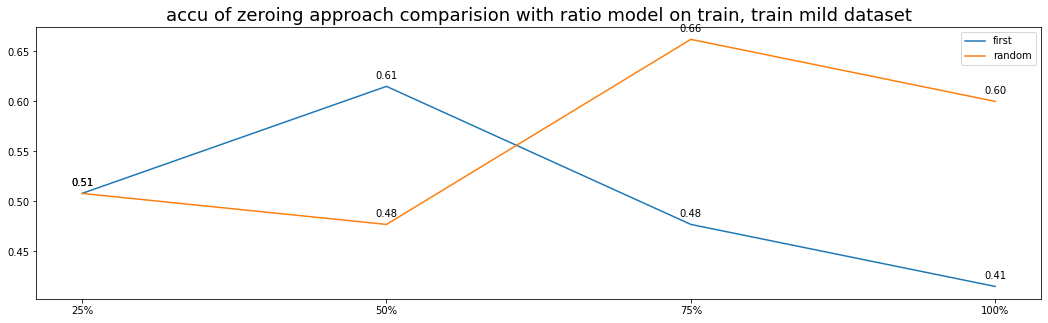

corr: -0.7392176666758011
 p-val:0.26078233332419887


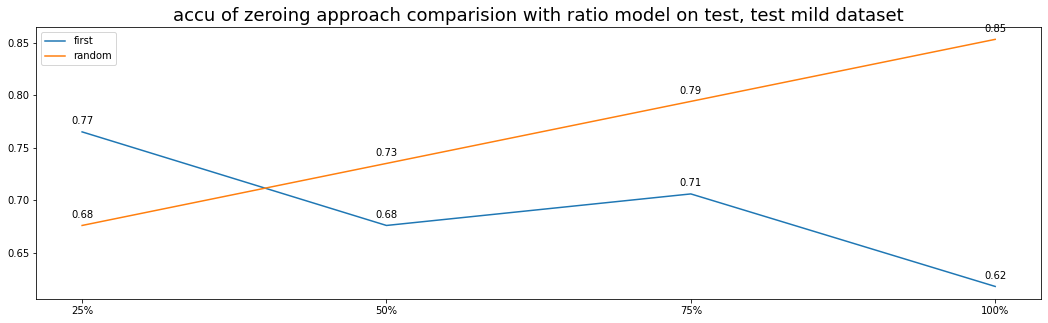

corr: -0.8662812165960595
 p-val:0.1337187834039405


In [53]:
make_plots_on_zero_style("combo", 25, "mild", "ratio", "accu", "train", "test")
make_plots_on_zero_style("combo", 25, "mild", "ratio", "accu", "train", "train")
make_plots_on_zero_style("combo", 25, "mild", "ratio", "accu", "test", "test")

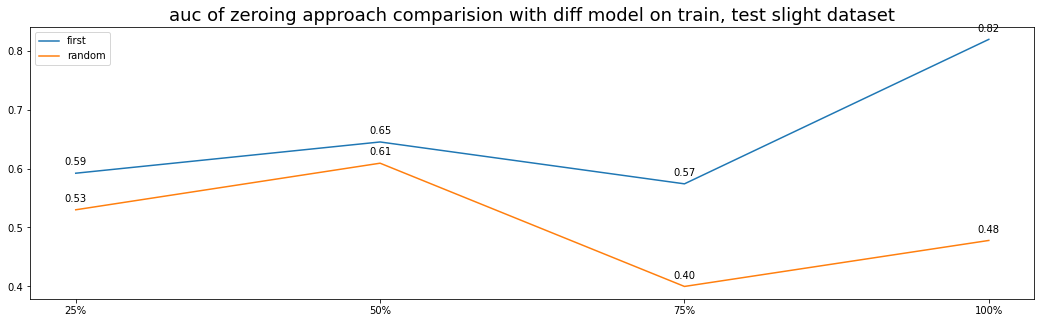

corr: 0.04982783787362471
 p-val:0.9501721621263753


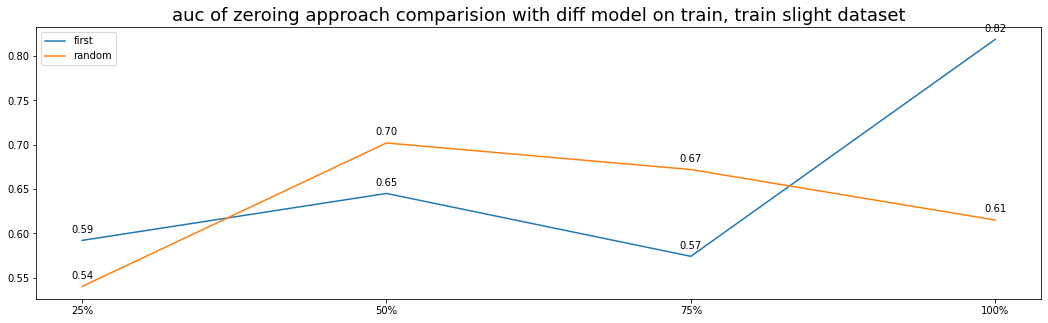

corr: -0.039073634103003164
 p-val:0.9609263658969969


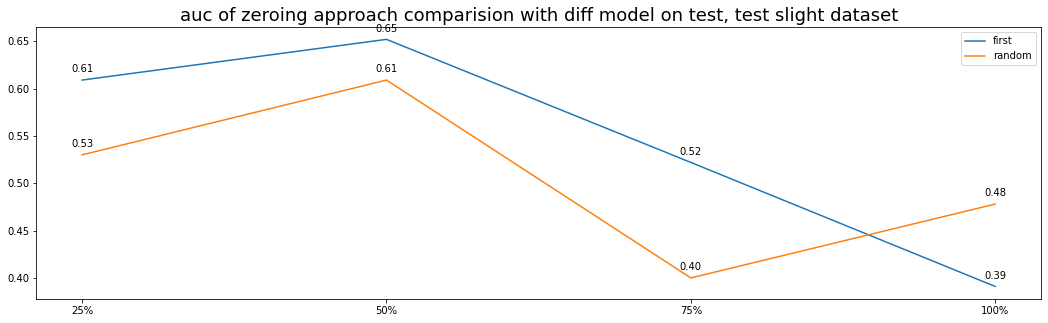

corr: 0.6352791068657162
 p-val:0.3647208931342838


In [54]:
make_plots_on_zero_style("combo", 25, "slight", "diff", "auc", "train", "test")
make_plots_on_zero_style("combo", 25, "slight", "diff", "auc", "train", "train")
make_plots_on_zero_style("combo", 25, "slight", "diff", "auc", "test", "test")

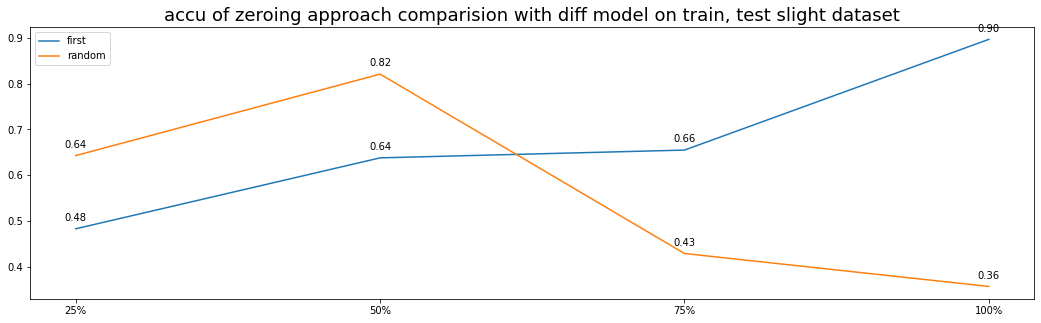

corr: -0.6284002957387661
 p-val:0.3715997042612339


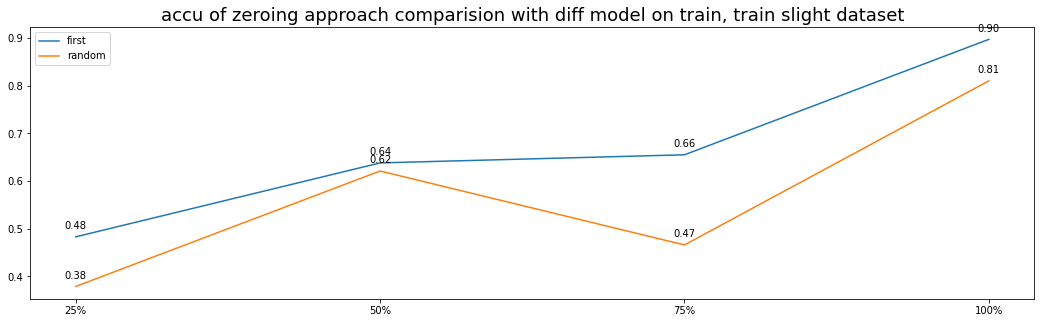

corr: 0.9279693058115087
 p-val:0.07203069418849128


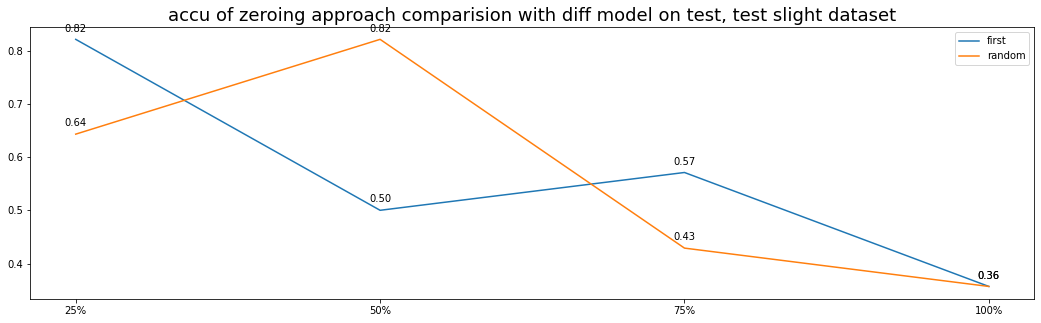

corr: 0.3726266417409324
 p-val:0.6273733582590676


In [55]:
make_plots_on_zero_style("combo", 25, "slight", "diff", "accu", "train", "test")
make_plots_on_zero_style("combo", 25, "slight", "diff", "accu", "train", "train")
make_plots_on_zero_style("combo", 25, "slight", "diff", "accu", "test", "test")

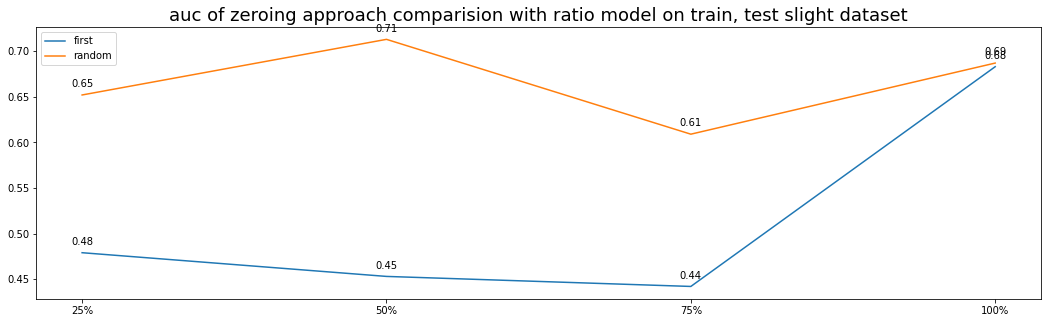

corr: 0.34368158727057563
 p-val:0.6563184127294244


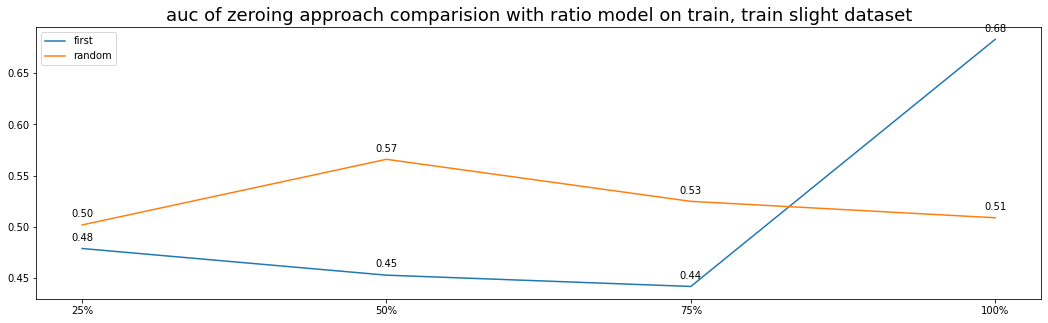

corr: -0.45059875696715646
 p-val:0.5494012430328435


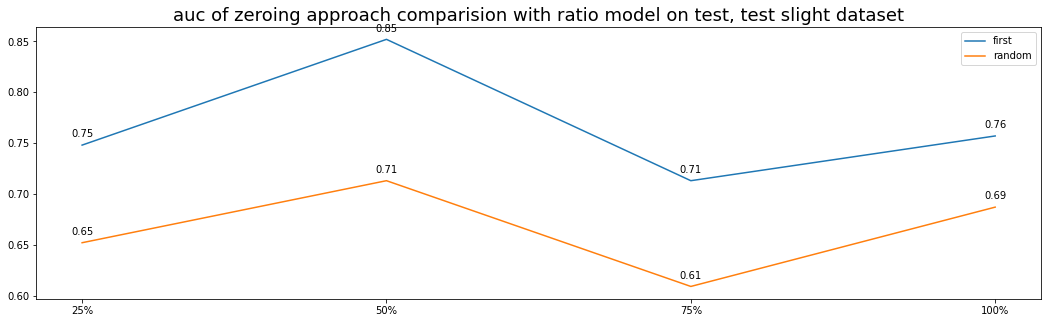

corr: 0.8872374966398506
 p-val:0.11276250336014937


In [56]:
make_plots_on_zero_style("combo", 25, "slight", "ratio", "auc", "train", "test")
make_plots_on_zero_style("combo", 25, "slight", "ratio", "auc", "train", "train")
make_plots_on_zero_style("combo", 25, "slight", "ratio", "auc", "test", "test")

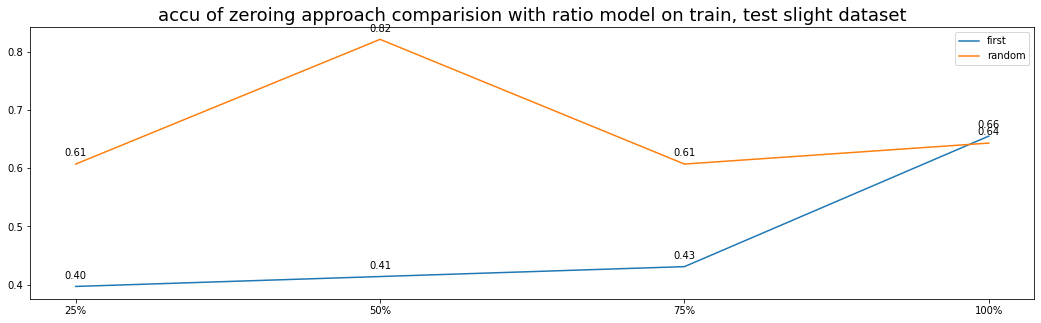

corr: -0.17136622566272908
 p-val:0.8286337743372709


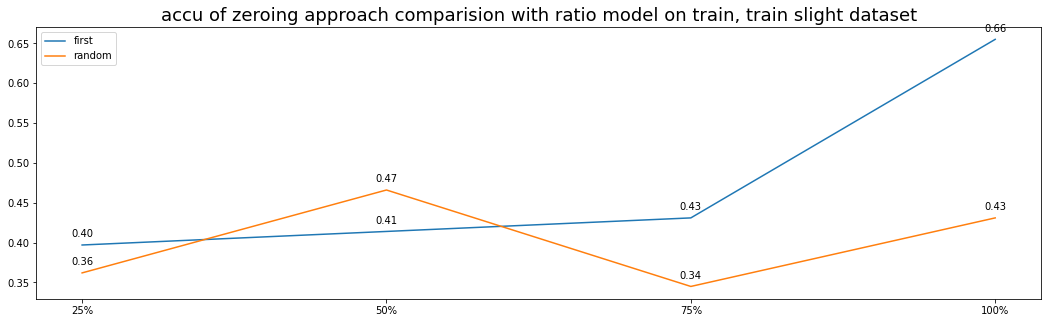

corr: 0.33403978864450606
 p-val:0.6659602113554939


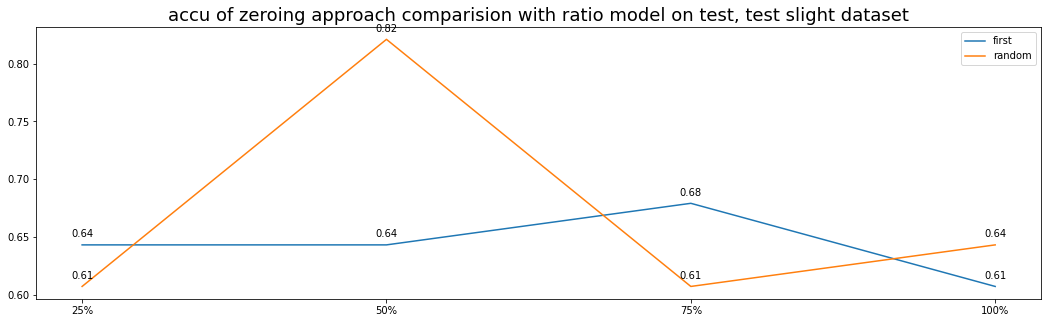

corr: -0.1435026208568102
 p-val:0.8564973791431898


In [57]:
make_plots_on_zero_style("combo", 25, "slight", "ratio", "accu", "train", "test")
make_plots_on_zero_style("combo", 25, "slight", "ratio", "accu", "train", "train")
make_plots_on_zero_style("combo", 25, "slight", "ratio", "accu", "test", "test")